In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from numpy.core.fromnumeric import mean
from scipy.stats import poisson
from pylab import text

In [2]:
def cm2inch(cm):
    return cm/2.54

def juego(N: int) -> tuple:
# =============================================================================
# Nuclei data
# =============================================================================
    half_life = 68.9 # half life in years of 232^U
    Gamma = math.log(2) / half_life # units years^-1
    mean_life = 1 / Gamma # units years
    n = 20
    Delta_T = half_life / 5 # units years 
    t = list(np.arange(0, n * mean_life, Delta_T))
    p = Gamma*Delta_T
# =============================================================================
# Exponential
# =============================================================================
    exponen = []

    for i in range(len(t)):
        # P.append(Delta_T * Gamma * N * math.exp(-Gamma * t[i]))
        exponen.append(N * math.exp(-Gamma * t[i]))

    P = []
    P = [0.0, 1 - p, p, 0.0]

    F = list(np.zeros(len(P)))
    for i in range(len(P) - 1):
        F[i+1] = F[i] + P[i+1] 
  

    exponen_norm = []
    for i in range(len(exponen)):
        exponen_norm.append(exponen[i] / sum(exponen))    

    exponen_norm.insert(0, 0.0)
    exponen_norm.insert(len(exponen_norm), 0.0)
    exponencial = list(np.zeros(len(exponen_norm)))
    
    F2 = list(np.zeros(len(exponen_norm)))
    for i in range(len(exponen_norm) - 1):
        F2[i+1] = F2[i] + exponen_norm[i+1] # Función acumulativa indice por indice
    
    F2.pop(0)
    F2.pop(-1)
    exponen_norm.pop(0)
    exponen_norm.pop(-1)
    
    rn.seed(123456789)
    for i in range(N):
        r = rn.uniform(0, 1)
        # r = rn.random()
        for j in range(1, len(exponen_norm) - 1):
            if r >= F2[j-1] and r < F2[j]:
                bingo = j
                break
        exponencial[bingo] += 1
    
    exponencial.pop(0)
    exponencial.pop(-1)
    
    exponencial = np.asarray(exponencial)/Delta_T
# =============================================================================
# Binomial
# =============================================================================
    binomial = []
    nucleos_totales = N
    rn.seed(123456789)
    
    for i in t:
        decs = 0
        for j in range(1, nucleos_totales + 1):
            num = rn.uniform(0, 1)
            if 0 <= num <= p:
                decs += 1
        nucleos_totales = nucleos_totales-decs      
        binomial.append(decs)
    binomial = np.asarray(binomial)/Delta_T
# =============================================================================
# Poisson
# =============================================================================

    conteo = []
    poison = []
    nucleos_totales = N
    rn.seed(123456789)
    for i in t:
        conteo.append(nucleos_totales)
        mu = nucleos_totales*p 
        decaimientos = sum(poisson.rvs(mu, size=1))
        nucleos_totales = nucleos_totales - decaimientos
        poison.append(decaimientos/Delta_T)
        
    
# =============================================================================
# Theory
# =============================================================================    
    t = np.asarray(t)
    theory = N*np.exp(-t/mean_life)/mean_life
    return (binomial, exponencial, poison, theory, t)


C:\Users\57321\AppData\Local\Temp/ipykernel_10720/3921186150.py:95: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2, l3, l4], labels=line_labels, loc="lower right", borderaxespad=0.2, title="", fontsize = 8)


6.2498938450343395


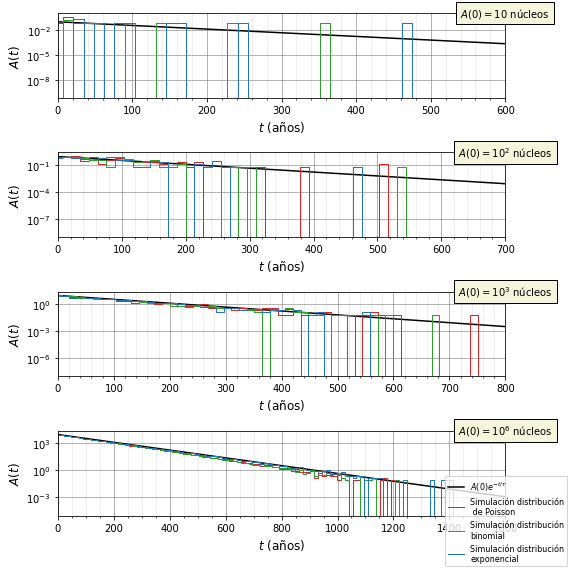

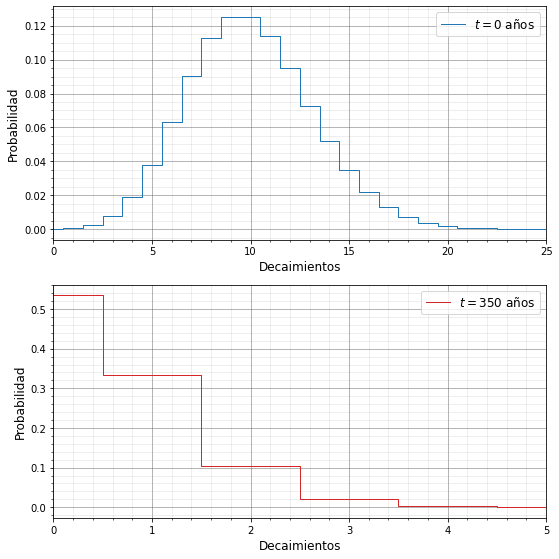

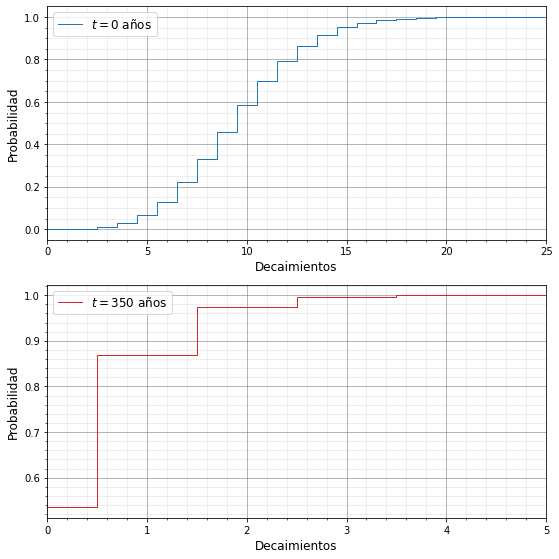

In [3]:
# =============================================================================
# Function call for each N
# =============================================================================  

binomial1, exponencial1, poison1, theory1, t1= juego(int(1e1))
binomial2, exponencial2, poison2, theory2, t2= juego(int(1e2))
binomial3, exponencial3, poison3, theory3, t3= juego(int(1e3))
binomial4, exponencial4, poison4, theory4, t4= juego(int(1e6))

# =============================================================================
# Plot
# =============================================================================  


fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4,1,figsize=(cm2inch(20),cm2inch(20)))
line_labels = [r"$A(0)e^{-t/\tau}$","Simulación distribución\n de Poisson", "Simulación distribución\nbinomial", "Simulación distribución\nexponencial"]

# =============================================================================
# Plot with N = 10**1
# =============================================================================  

l1 = ax1.plot(t1,theory1,color="black", linewidth=1.5)[0]
l2 = ax1.plot(t1,poison1,drawstyle="steps-mid",alpha = 1,linewidth=1,color="tab:red")[0]
l3 = ax1.plot(t1,binomial1, color="tab:green", drawstyle="steps-mid",alpha = 1, linewidth=1)[0]
l4 = ax1.plot(t1,exponencial1, color="tab:blue", drawstyle="steps-mid", linewidth=1,alpha = 1)[0]

ax1.set_ylabel("$A(t)$", fontsize="large", axes=ax1)
ax1.set_xlabel("$t$ (años)", fontsize="large", axes=ax1)
ax1.set_xlim([0,600])
ax1.set_yscale("log")
ax1.grid(b=True, which="major", color="#666666", linestyle="-", alpha=0.6)
ax1.minorticks_on()
ax1.grid(b=True, which="minor", color="#999999", linestyle="-", alpha=0.2)
ax1.text(1, 1, r'$A(0)=10$ núcleos', horizontalalignment='center', verticalalignment='center', rotation=0, transform=ax1.transAxes, bbox={"fc":"beige"},fontsize=10)

# =============================================================================
# Plot with N = 10**2
# =============================================================================  

ax2.plot(t2,theory2,color="black", linewidth=1.5)
ax2.plot(t2,poison2,drawstyle="steps-mid",alpha = 1,linewidth=1,color="tab:red")
ax2.plot(t2,binomial2, color="tab:green", drawstyle="steps-mid",alpha = 1, linewidth=1)
ax2.plot(t2,exponencial2, color="tab:blue", drawstyle="steps-mid", linewidth=1,alpha = 1)
ax2.set_ylabel("$A(t)$", fontsize="large")
ax2.set_xlabel("$t$ (años)", fontsize="large")
ax2.set_xlim([0,700])
ax2.set_yscale("log")
ax2.grid(b=True, which="major", color="#666666", linestyle="-", alpha=0.6)
ax2.minorticks_on()
ax2.grid(b=True, which="minor", color="#999999", linestyle="-", alpha=0.2)
ax2.text(1, 1, r'$A(0)=10^2$ núcleos', horizontalalignment='center', verticalalignment='center', rotation=0, transform=ax2.transAxes, bbox={"fc":"beige"})



# =============================================================================
# Plot with N = 10**3
# =============================================================================  

ax3.plot(t3,theory3,color="black", linewidth=1.5)
ax3.plot(t3,poison3,drawstyle="steps-mid",alpha = 1,linewidth=1,color="tab:red")
ax3.plot(t3,binomial3, color="tab:green", drawstyle="steps-mid",alpha = 1, linewidth=1)
ax3.plot(t3,exponencial3, color="tab:blue", drawstyle="steps-mid", linewidth=1,alpha = 1)
ax3.set_ylabel("$A(t)$", fontsize="large")
ax3.set_xlabel("$t$ (años)", fontsize="large")
ax3.set_xlim([0,800])
ax3.set_yscale("log")
ax3.grid(b=True, which="major", color="#666666", linestyle="-", alpha=0.6)
ax3.minorticks_on()
ax3.grid(b=True, which="minor", color="#999999", linestyle="-", alpha=0.2)
ax3.text(1, 1, r'$A(0)=10^3$ núcleos', horizontalalignment='center', verticalalignment='center', rotation=0, transform=ax3.transAxes, bbox={"fc":"beige"})

# =============================================================================
# Plot with N = 10**6
# =============================================================================  

ax4.plot(t4,theory4,color="black", linewidth=1.5)
ax4.plot(t4,poison4,drawstyle="steps-mid",alpha = 1,linewidth=1,color="tab:red")
ax4.plot(t4,binomial4, color="tab:green", drawstyle="steps-mid",alpha = 1, linewidth=1)
ax4.plot(t4,exponencial4, color="tab:blue", drawstyle="steps-mid", linewidth=1,alpha = 1)
ax4.set_yscale("log")
ax4.set_ylabel("$A(t)$", fontsize="large")
ax4.set_xlabel("$t$ (años)", fontsize="large")

ax4.set_xlim([0,1600])

ax4.grid(b=True, which="major", color="#666666", linestyle="-", alpha=0.6)
ax4.minorticks_on()
ax4.grid(b=True, which="minor", color="#999999", linestyle="-", alpha=0.2)
ax4.text(1, 1, r'$A(0)=10^6$ núcleos', horizontalalignment='center', verticalalignment='center', rotation=0, transform=ax4.transAxes, bbox={"fc":"beige"})

# =============================================================================
# Legend
# =============================================================================  

fig.legend([l1, l2, l3, l4], labels=line_labels, loc="lower right", borderaxespad=0.2, title="", fontsize = 8)
plt.tight_layout()
plt.savefig("567.png",dpi=300)



# ==================================================================================================================================================================
# Punto 4
# ==================================================================================================================================================================

nucleos_tiempointermedio = theory2[20]*99.4 # N = A/Gamma = A*tau
mu2 = nucleos_tiempointermedio*0.1
mu1 = (10**2)*0.1
x = np.arange(0,10**2)
print(theory2[20]*99.4)


fig2, ((x5),(x6)) = plt.subplots(2,1,figsize=(cm2inch(20),cm2inch(20)))
x5.plot(x,poisson.pmf(x,mu1),label="$t=0 $ años",drawstyle="steps-mid",alpha = 1,linewidth=1,color="tab:blue")
x6.plot(x,poisson.pmf(x,mu2),label="$t=350$ años",drawstyle="steps-mid",alpha = 1,linewidth=1,color="tab:red")
x5.set_xlabel("Decaimientos", fontsize="large")
x5.set_xlim([0,25])
x5.set_ylabel("Probabilidad", fontsize="large")
x5.legend(framealpha=0.8, fontsize="large")
x5.grid(b=True, which="major", color="#666666", linestyle="-", alpha=0.6)
x5.minorticks_on()
x5.grid(b=True, which="minor", color="#999999", linestyle="-", alpha=0.2)
x6.set_xlabel("Decaimientos", fontsize="large")
x6.set_xlim([0,5])
x6.set_ylabel("Probabilidad", fontsize="large")
x6.legend(framealpha=0.8, fontsize="large")
x6.grid(b=True, which="major", color="#666666", linestyle="-", alpha=0.6)
x6.minorticks_on()
x6.grid(b=True, which="minor", color="#999999", linestyle="-", alpha=0.2)
plt.tight_layout()
plt.savefig("5a.png",dpi=300)


fig3, ((x7),(x8)) = plt.subplots(2,1,figsize=(cm2inch(20),cm2inch(20)))
x7.plot(x,poisson.cdf(x,mu1),label="$t=0 $ años",drawstyle="steps-mid",alpha = 1,linewidth=1,color="tab:blue")
x8.plot(x,poisson.cdf(x,mu2),label="$t=350$ años",drawstyle="steps-mid",alpha = 1,linewidth=1,color="tab:red")
x7.set_xlabel("Decaimientos", fontsize="large")
x7.set_xlim([0,25])
x7.set_ylabel("Probabilidad", fontsize="large")
x7.legend(framealpha=0.8, fontsize="large")
x7.grid(b=True, which="major", color="#666666", linestyle="-", alpha=0.6)
x7.minorticks_on()
x7.grid(b=True, which="minor", color="#999999", linestyle="-", alpha=0.2)
x8.set_xlabel("Decaimientos", fontsize="large")
x8.set_xlim([0,5])
x8.set_ylabel("Probabilidad", fontsize="large")
x8.legend(framealpha=0.8, fontsize="large")
x8.grid(b=True, which="major", color="#666666", linestyle="-", alpha=0.6)
x8.minorticks_on()
x8.grid(b=True, which="minor", color="#999999", linestyle="-", alpha=0.2)
plt.tight_layout()
plt.savefig("5b.png",dpi=1200)


